In [ ]:
import numpy as np
import pandas as pd
import seaborn as  sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

data = pd.read_csv('dataset/creditcard.csv')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:-1], data.iloc[:,-1], test_size=0.2, random_state=42)

Define model evaluation metrics calculation function

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
def calculate_metrics(y_actual, y_pred):
    f1_sc = f1_score(y_actual, y_pred)
    acc_sc = accuracy_score(y_actual, y_pred)
    rec_sc = recall_score(y_actual, y_pred)
    prec_sc = precision_score(y_actual, y_pred)
    conf = confusion_matrix(y_actual, y_pred)
    tn, fp, fn, tp = conf.ravel()
    print(" accuracy:" + str((tn+tp)/(tp+tn+fp+fn)))
    res = " accuracy score: {}\n recall_score: {}\n precision_score: {}\n f1_score: {}"
    print(res.format(acc_sc, rec_sc, prec_sc, prec_sc, f1_sc))
    
    return conf

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

### Evaluate Decision Tree model

----------------------------
The training accuracy
----------------------------
 accuracy:1.0
 accuracy score: 1.0
 recall_score: 1.0
 precision_score: 1.0
 f1_score: 1.0
----------------------------
The test accuracy
----------------------------
 accuracy:0.9992275552122467
 accuracy score: 0.9992275552122467
 recall_score: 0.7959183673469388
 precision_score: 0.7647058823529411
 f1_score: 0.7647058823529411


<AxesSubplot:title={'center':'Confusion Matrix for test accuracy'}>

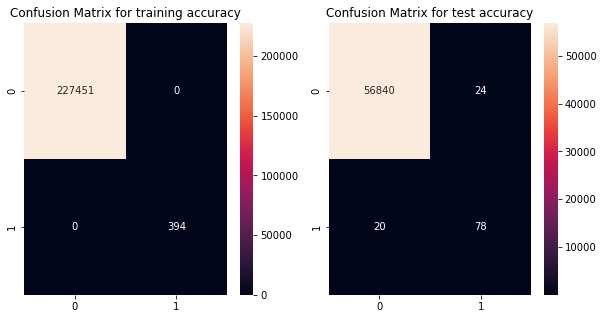

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('----------------------------\nThe training accuracy\n----------------------------')
train_conf_mat = calculate_metrics(y_train, y_train_pred)
print('----------------------------\nThe test accuracy\n----------------------------')
test_conf_mat = calculate_metrics(y_test, y_test_pred)

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))

ax1.set_title('Confusion Matrix for training accuracy')
sns.heatmap(train_conf_mat,ax=ax1, annot=True, fmt='d')

ax2.set_title('Confusion Matrix for test accuracy')
sns.heatmap(test_conf_mat,ax=ax2, annot=True, fmt='d')


### Train using oversampled and balanced data

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier()

### Evaluate ROS Decision Tree model

----------------------------
The training accuracy
----------------------------
 accuracy:1.0
 accuracy score: 1.0
 recall_score: 1.0
 precision_score: 1.0
 f1_score: 1.0
----------------------------
The test accuracy
----------------------------
 accuracy:0.9990168884519505
 accuracy score: 0.9990168884519505
 recall_score: 0.7142857142857143
 precision_score: 0.7142857142857143
 f1_score: 0.7142857142857143


<AxesSubplot:title={'center':'Confusion Matrix for test accuracy'}>

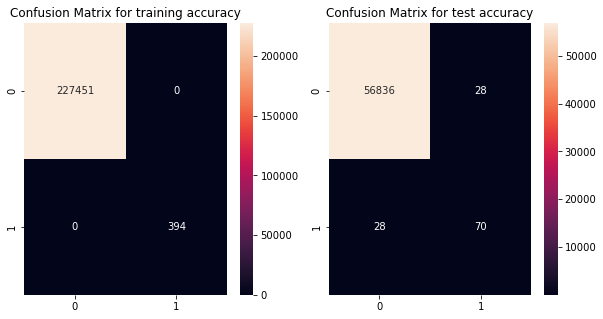

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('----------------------------\nThe training accuracy\n----------------------------')
train_conf_mat = calculate_metrics(y_train, y_train_pred)
print('----------------------------\nThe test accuracy\n----------------------------')
test_conf_mat = calculate_metrics(y_test, y_test_pred)

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))

ax1.set_title('Confusion Matrix for training accuracy')
sns.heatmap(train_conf_mat,ax=ax1, annot=True, fmt='d')

ax2.set_title('Confusion Matrix for test accuracy')
sns.heatmap(test_conf_mat,ax=ax2, annot=True, fmt='d')

### Improve DT model to have a better test accuracy and avoid overfitting to training data

- We will use GridSearch to try different hyperparameter values and choose the best.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
param_grid = {"criterion" : ['gini', 'entropy']}

model = DecisionTreeClassifier(random_state=42)

scorer = make_scorer(fbeta_score,beta=1)
dtree_gscv = GridSearchCV(model, param_grid)

grid_fit = dtree_gscv.fit(X_train_resampled, y_train_resampled)

print(dtree_gscv.best_params_)

best_classifier = grid_fit.best_estimator_
y_train_pred = best_classifier.predict(X_train)
y_test_pred = best_classifier.predict(X_test)

print('----------------------------\nThe training accuracy\n----------------------------')
train_conf_mat = calculate_metrics(y_train, y_train_pred)
print('----------------------------\nThe test accuracy\n----------------------------')
test_conf_mat = calculate_metrics(y_test, y_test_pred)

{'criterion': 'gini'}
----------------------------
The training accuracy
----------------------------
 accuracy:1.0
 accuracy score: 1.0
 recall_score: 1.0
 precision_score: 1.0
 f1_score: 1.0
----------------------------
The test accuracy
----------------------------
 accuracy:0.9990344440153085
 accuracy score: 0.9990344440153085
 recall_score: 0.7142857142857143
 precision_score: 0.7216494845360825
 f1_score: 0.7216494845360825


<AxesSubplot:title={'center':'Confusion Matrix for test accuracy'}>

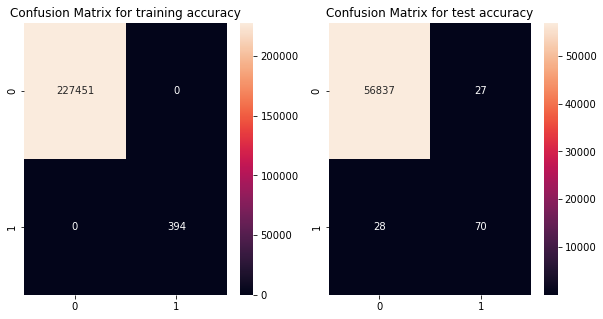

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))

ax1.set_title('Confusion Matrix for training accuracy')
sns.heatmap(train_conf_mat,ax=ax1, annot=True, fmt='d')

ax2.set_title('Confusion Matrix for test accuracy')
sns.heatmap(test_conf_mat,ax=ax2, annot=True, fmt='d')

# Logistic Regression

c:\Users\atik_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


----------------------------
The training accuracy
----------------------------
 accuracy:0.99923632293884
 accuracy score: 0.99923632293884
 recall_score: 0.6395939086294417
 precision_score: 0.8873239436619719
 f1_score: 0.8873239436619719
----------------------------
The test accuracy
----------------------------
 accuracy:0.9991046662687406
 accuracy score: 0.9991046662687406
 recall_score: 0.5918367346938775
 precision_score: 0.8405797101449275
 f1_score: 0.8405797101449275


<AxesSubplot:title={'center':'Confusion Matrix for test accuracy'}>

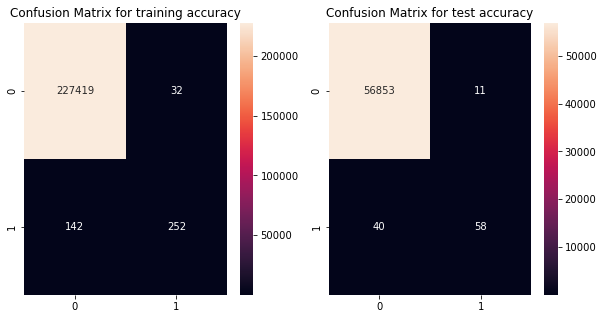

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('----------------------------\nThe training accuracy\n----------------------------')
train_conf_mat = calculate_metrics(y_train, y_train_pred)
print('----------------------------\nThe test accuracy\n----------------------------')
test_conf_mat = calculate_metrics(y_test, y_test_pred)

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))

ax1.set_title('Confusion Matrix for training accuracy')
sns.heatmap(train_conf_mat,ax=ax1, annot=True, fmt='d')

ax2.set_title('Confusion Matrix for test accuracy')
sns.heatmap(test_conf_mat,ax=ax2, annot=True, fmt='d')


### Train using oversampled and balanced data

c:\Users\atik_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


----------------------------
The training accuracy
----------------------------
 accuracy:0.944007720344162
 accuracy score: 0.944007720344162
 recall_score: 0.9148783694070372
 precision_score: 0.9714752567693744
 f1_score: 0.9714752567693744
----------------------------
The test accuracy
----------------------------
 accuracy:0.9723324321477477
 accuracy score: 0.9723324321477477
 recall_score: 0.9183673469387755
 precision_score: 0.054282267792521106
 f1_score: 0.054282267792521106


<AxesSubplot:title={'center':'Confusion Matrix for test accuracy'}>

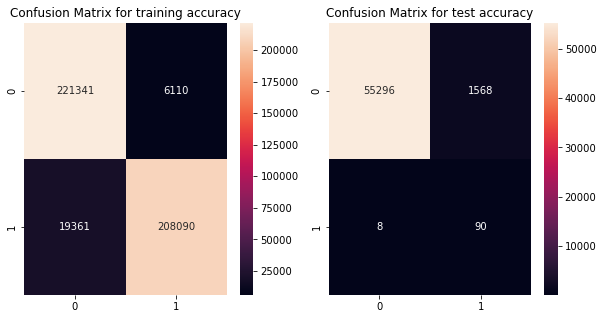

In [ ]:
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

y_train_pred = model.predict(X_train_resampled)
y_test_pred = model.predict(X_test)

print('----------------------------\nThe training accuracy\n----------------------------')
train_conf_mat = calculate_metrics(y_train_resampled, y_train_pred)
print('----------------------------\nThe test accuracy\n----------------------------')
test_conf_mat = calculate_metrics(y_test, y_test_pred)

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))

ax1.set_title('Confusion Matrix for training accuracy')
sns.heatmap(train_conf_mat,ax=ax1, annot=True, fmt='d')

ax2.set_title('Confusion Matrix for test accuracy')
sns.heatmap(test_conf_mat,ax=ax2, annot=True, fmt='d')

c:\Users\atik_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\atik_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

----------------------------
The training accuracy
----------------------------
 accuracy:0.944007720344162
 accuracy score: 0.944007720344162
 recall_score: 0.9148783694070372
 precision_score: 0.9714752567693744
 f1_score: 0.9714752567693744
----------------------------
The test accuracy
----------------------------
 accuracy:0.9723324321477477
 accuracy score: 0.9723324321477477
 recall_score: 0.9183673469387755
 precision_score: 0.054282267792521106
 f1_score: 0.054282267792521106


<AxesSubplot:title={'center':'Confusion Matrix for test accuracy'}>

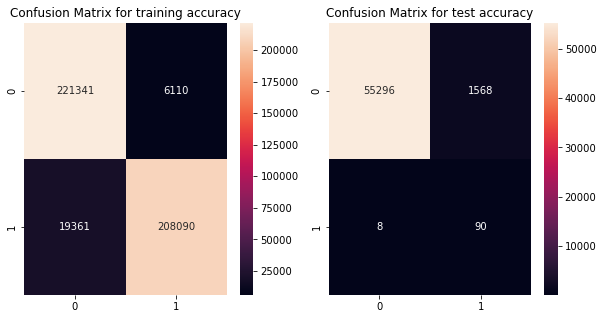

In [ ]:

clf = LogisticRegression()

param_grid = {'penalty': ['l1', 'l2'], 'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_lr = GridSearchCV(clf, param_grid = param_grid,scoring = 'recall')
grid_lr.fit(X_train_resampled, y_train_resampled)

y_train_pred = grid_lr.predict(X_train_resampled)
y_test_pred = grid_lr.predict(X_test)

print('----------------------------\nThe training accuracy\n----------------------------')
train_conf_mat = calculate_metrics(y_train_resampled, y_train_pred)
print('----------------------------\nThe test accuracy\n----------------------------')
test_conf_mat = calculate_metrics(y_test, y_test_pred)

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))

ax1.set_title('Confusion Matrix for training accuracy')
sns.heatmap(train_conf_mat,ax=ax1, annot=True, fmt='d')

ax2.set_title('Confusion Matrix for test accuracy')
sns.heatmap(test_conf_mat,ax=ax2, annot=True, fmt='d')

# Support Vector Machine

In [ ]:
svm_c = SVC()
parameters = {
    'C': list(range(1,12)),
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': list(range(1,7))
}

# Run a randomized search over the hyperparameters
random_search = RandomizedSearchCV(svm_c, param_distributions=parameters, verbose=3)

# wasn't able to get a result without scaling
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

# Fit the model on the training data
random_search.fit(X_train, y_train)

best_fit_svm = random_search.best_estimator_

# Make predictions on the test data
svc_preds = best_fit_svm.predict(X_test)


# Return your metrics on test data
ch.print_metrics(y_test, svc_preds, 'svc')